In [2]:
import cairocffi as cairo

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
def paint_text(text, w, h, rotate=False, ud=False, multi_fonts=False):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, w, h)
    with cairo.Context(surface) as context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
        # this font list works in CentOS 7
        if multi_fonts:
            fonts = [
                'Century Schoolbook', 'Courier', 'STIX',
                'URW Chancery L', 'FreeMono']
            context.select_font_face(
                np.random.choice(fonts),
                cairo.FONT_SLANT_NORMAL,
                np.random.choice([cairo.FONT_WEIGHT_BOLD, cairo.FONT_WEIGHT_NORMAL]))
        else:
            context.select_font_face('Courier',
                                     cairo.FONT_SLANT_NORMAL,
                                     cairo.FONT_WEIGHT_BOLD)
        context.set_font_size(25)
        box = context.text_extents(text)
        border_w_h = (4, 4)
        if box[2] > (w - 2 * border_w_h[1]) or box[3] > (h - 2 * border_w_h[0]):
            raise IOError(('Could not fit string into image.'
                           'Max char count is too large for given image width.'))

        # teach the RNN translational invariance by
        # fitting text box randomly on canvas, with some room to rotate
        max_shift_x = w - box[2] - border_w_h[0]
        max_shift_y = h - box[3] - border_w_h[1]
        top_left_x = np.random.randint(0, int(max_shift_x))
        if ud:
            top_left_y = np.random.randint(0, int(max_shift_y))
        else:
            top_left_y = h // 2
        context.move_to(top_left_x - int(box[0]), top_left_y - int(box[1]))
        context.set_source_rgb(0, 0, 0)
        context.show_text(text)

    buf = surface.get_data()
    a = np.frombuffer(buf, np.uint8)
    a.shape = (h, w, 4)
    a = a[:, :, 0]  # grab single channel
    a = a.astype(np.float32) / 255
    a = np.expand_dims(a, 0)
    if rotate:
        a = image.random_rotation(a, 3 * (w - top_left_x) / w + 1)
    #a = speckle(a)

    return a

In [6]:
img = paint_text("chaitu",w=128,h=64)

In [7]:
img.shape

(1, 64, 128)

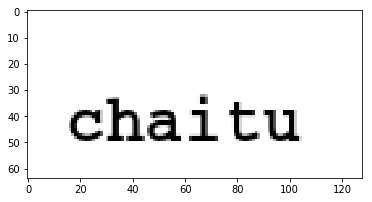

In [8]:
plt.imshow(img[0,:,:],cmap='gray')

In [9]:
import pangocairocffi
import pangocffi

In [10]:
FONT = "Courier Bold 20"

In [37]:
def paint_text_tel(text, w, h, rotate=False, ud=False, multi_fonts=False):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, w, h)
    with cairo.Context(surface) as context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
        # this font list works in CentOS 7
        if multi_fonts:
            fonts = [
                'Century Schoolbook', 'Courier', 'STIX',
                'URW Chancery L', 'FreeMono']
            context.select_font_face(
                np.random.choice(fonts),
                cairo.FONT_SLANT_NORMAL,
                np.random.choice([cairo.FONT_WEIGHT_BOLD, cairo.FONT_WEIGHT_NORMAL]))
        else:
            context.select_font_face('Courier',
                                     cairo.FONT_SLANT_NORMAL,
                                     cairo.FONT_WEIGHT_BOLD)
        context.set_font_size(25)
        box = context.text_extents(text)
        border_w_h = (8, 8)
        if box[2] > (w - 2 * border_w_h[1]) or box[3] > (h - 2 * border_w_h[0]):
            raise IOError(('Could not fit string into image.'
                           'Max char count is too large for given image width.'))

        # teach the RNN translational invariance by
        # fitting text box randomly on canvas, with some room to rotate
        max_shift_x = w - box[2] - border_w_h[0]
        max_shift_y = h - box[3] - border_w_h[1]
        top_left_x = np.random.randint(0, int(max_shift_x))
        if ud:
            top_left_y = np.random.randint(0, int(max_shift_y))
        else:
            top_left_y = h // 2
        #context.move_to(top_left_x - int(box[0]), top_left_y - int(box[1]))
        context.set_source_rgb(0, 0, 0)
        desc = pangocffi.FontDescription()
        desc.set_family("Courier.TTF")
        desc.set_size(20)
        pangocffi.glyph_item
        layout = pangocairocffi.create_layout(context)
        #desc = pangocffi.FontDescription.set_size(layout,size=20)
        #layout.set_font_description(desc=desc)
        layout.set_alignment(pangocffi.Alignment.RIGHT)
        layout.set_alignment(pangocffi.Alignment.CENTER)
        tex ='<span font="Courier italic 15">'+text+'</span>'
        layout.set_markup(tex)
        #layout.set_text(text)
        #layout.set_font_description(desc)
        pangocairocffi.show_layout(context,layout)
        
        #context.show_text(text)

    buf = surface.get_data()
    a = np.frombuffer(buf, np.uint8)
    a.shape = (h, w, 4)
    a = a[:, :, 0]  # grab single channel
    a = a.astype(np.float32) / 255
    a = np.expand_dims(a, 0)
    if rotate:
        a = image.random_rotation(a, 3 * (w - top_left_x) / w + 1)
    #a = speckle(a)

    return a

In [38]:
img2 = paint_text_tel("chaitu",w=128,h=64)

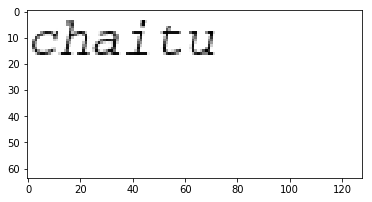

In [39]:
plt.imshow(img2[0,:,:],cmap='gray')